In [1]:
%pip install pandas
%pip install matplotlib
%pip install seaborn
%pip install plotly
%pip install emoji
%pip install nltk
%pip install wordcloud
%pip install scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 358.9/358.9 kB 6.0 MB/s eta 0:00:00


In [2]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
import plotly.express as px
import emoji
import string
import nltk
#from PIL import Image
from collections import Counter
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
#from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer

#from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
#from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score,confusion_matrix,classification_report
#from sklearn.model_selection import GridSearchCV
#from sklearn.model_selection import RandomizedSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
#from sklearn.ensemble import AdaBoostClassifier
#from sklearn.svm import SVC, LinearSVC
#from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
#from sklearn.pipeline import Pipeline
#from transformers import MarianMTModel, MarianTokenizer
#from transformers import pipeline

import pickle

In [3]:
!pip install googletrans==4.0.0-rc1

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 27.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 15.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 kB 9.2 MB/s eta 0:00:00
  Created wheel for googletrans: filename=googletrans-4.0.0rc1-py3-none-any.whl size=17396 sha256=a1914c1eb7f5c2c9632574abf90901806f1de74599a564f3e6712b9da6cbc23c
  Stored in directory: /root/.cache/pip/wheels/c0/59/9f/7372f0cf70160fe61b528532e1a7c8498c4becd6bcffb022de
Successfully built googletrans
  Attempting uninstall: chardet
    Found existing installation: chardet 5.2.0
    Uninstalling 

In [4]:
from googletrans import Translator

In [5]:
df=pd.read_csv('/content/dataset(arabic).csv')

In [6]:
df.head()

,HITId,tweet,sentiment,directness,annotator_sentiment,target,group
0,1,صلاة الفجر خير لك من ترديد بول البعير وسبي الن...,hateful_normal,indirect,shock,gender,individual
1,2,صراحة نفسي اشوف ولاد الوسخة اللي قالوا مدرب اج...,offensive,indirect,anger_confusion_sadness_indifference_disgust,other,other
2,3,طيب! هي متبرجة وعبايتها ملونه وطالعة من بيتهم ...,offensive,indirect,indifference,other,individual
3,4,@user @user انا اوافقك بخصوص السوريين و العراق...,normal,direct,indifference,origin,other
4,5,هذه السعودية التي شعبها شعب الخيم و بول البعير...,normal,indirect,indifference,origin,other


In [7]:
df.tail()

,HITId,tweet,sentiment,directness,annotator_sentiment,target,group
3347,3349,@user يمشي بخطا ادارتها قيد من الأمريكان ونهب ...,disrespectful_normal,direct,sadness,origin,other
3348,3350,@user مهما حصل هندوس عليهم شويه الرويبضه بس نخ...,hateful,indirect,anger_indifference,other,other
3349,3351,الكلب لا يعض اذن اخوه كذابين خنازير @url,offensive_hateful,indirect,disgust,other,other
3350,3352,@user لأنه صغير ويكتب في قناة خنازير فلن نقرأ ...,hateful,indirect,shock,other,other
3351,3353,الحريم أجمع افلوس وايفون قديم وواتساب ٢٤ ساعة,normal,indirect,indifference,origin,women


In [8]:
#checking missing values
df.isnull().sum() #no missing values

HITId                  0
tweet                  0
sentiment              0
directness             0
annotator_sentiment    0
target                 0
group                  0
dtype: int64

In [9]:
df.drop('HITId', axis='columns', inplace= True)
df.drop('sentiment',axis='columns',  inplace= True)
df.drop('directness', axis='columns', inplace= True)
df.drop('annotator_sentiment', axis='columns', inplace= True)
df.drop('group', axis='columns', inplace= True)

In [10]:
df.head()

,tweet,target
0,صلاة الفجر خير لك من ترديد بول البعير وسبي الن...,gender
1,صراحة نفسي اشوف ولاد الوسخة اللي قالوا مدرب اج...,other
2,طيب! هي متبرجة وعبايتها ملونه وطالعة من بيتهم ...,other
3,@user @user انا اوافقك بخصوص السوريين و العراق...,origin
4,هذه السعودية التي شعبها شعب الخيم و بول البعير...,origin


In [11]:
df['target'].value_counts()

other       1782
origin       877
gender       548
religion     145
Name: target, dtype: int64

In [12]:
#renaming
#cleaning and data processing

In [13]:
df=df.rename(columns={
    'tweet':'text',
})

In [14]:
df.head()

,text,target
0,صلاة الفجر خير لك من ترديد بول البعير وسبي الن...,gender
1,صراحة نفسي اشوف ولاد الوسخة اللي قالوا مدرب اج...,other
2,طيب! هي متبرجة وعبايتها ملونه وطالعة من بيتهم ...,other
3,@user @user انا اوافقك بخصوص السوريين و العراق...,origin
4,هذه السعودية التي شعبها شعب الخيم و بول البعير...,origin


In [15]:
# Function to translate text using Google Translate API
def translate_text(text):
    target_language='en'
    import httpx
    timeout = httpx.Timeout(256)
    translator = Translator(timeout=timeout)
    translated_text = translator.translate(text, dest=target_language)
    print (translated_text.text)
    return translated_text.text

In [16]:
df.head()

,text,target
0,صلاة الفجر خير لك من ترديد بول البعير وسبي الن...,gender
1,صراحة نفسي اشوف ولاد الوسخة اللي قالوا مدرب اج...,other
2,طيب! هي متبرجة وعبايتها ملونه وطالعة من بيتهم ...,other
3,@user @user انا اوافقك بخصوص السوريين و العراق...,origin
4,هذه السعودية التي شعبها شعب الخيم و بول البعير...,origin


In [17]:
# Translate text to English (you can choose a different target language)
df['translated_text'] = df['text'].apply(translate_text)

Fajr prayer is better for you than repeating the urine of the camel, the captivity of women, and the rape of a child of cleanliness, activity and vitality #rationalists
Frankly, I see the children of the dirt who said a foreign coach from you to God, our Lord, you will take you ... @url
good!She is a proliferation and her abaya is colorful and bright from their home without ....... @url
@user @user I agree with you about the Syrians and Iraqis. As for the Saudi, it does not need to be in Kuwait Bedouin ... @url
This Saudi Arabia, whose people are the people of tents and Paul Al -Bayer, which people are mocking
I don’t know that I saw her very perverted and I am young
@user @user Imagine that you will tell you, according to our information, that the inhabitants of the earth drink the urine of the camel
Morning trust in God and seeking his livelihood and confidence in what he has #Africa_A_Ali
And you are the money of your mother, O divorced, O Bira, Yaush, channels @url
@user @user Kurd

In [18]:
df

,text,target,translated_text
0,صلاة الفجر خير لك من ترديد بول البعير وسبي الن...,gender,Fajr prayer is better for you than repeating t...
1,صراحة نفسي اشوف ولاد الوسخة اللي قالوا مدرب اج...,other,"Frankly, I see the children of the dirt who sa..."
2,طيب! هي متبرجة وعبايتها ملونه وطالعة من بيتهم ...,other,good!She is a proliferation and her abaya is c...
3,@user @user انا اوافقك بخصوص السوريين و العراق...,origin,@user @user I agree with you about the Syrians...
4,هذه السعودية التي شعبها شعب الخيم و بول البعير...,origin,"This Saudi Arabia, whose people are the people..."
...,...,...,...
3347,@user يمشي بخطا ادارتها قيد من الأمريكان ونهب ...,origin,@user walks in a line of management of the Ame...
3348,@user مهما حصل هندوس عليهم شويه الرويبضه بس نخ...,other,"@user, whatever Hindus, they have a little bit..."
3349,الكلب لا يعض اذن اخوه كذابين خنازير @url,other,"The dog does not bite his brother, liars, pigs..."
3350,@user لأنه صغير ويكتب في قناة خنازير فلن نقرأ ...,other,@user because he is young and writes in a pig ...


In [19]:
df['target_encoded']=df['target'].replace({
    'other':0,
    'origin':1,
    'gender':2,
    'religion':3,
})

In [20]:
df.head()

,text,target,translated_text,target_encoded
0,صلاة الفجر خير لك من ترديد بول البعير وسبي الن...,gender,Fajr prayer is better for you than repeating t...,2
1,صراحة نفسي اشوف ولاد الوسخة اللي قالوا مدرب اج...,other,"Frankly, I see the children of the dirt who sa...",0
2,طيب! هي متبرجة وعبايتها ملونه وطالعة من بيتهم ...,other,good!She is a proliferation and her abaya is c...,0
3,@user @user انا اوافقك بخصوص السوريين و العراق...,origin,@user @user I agree with you about the Syrians...,1
4,هذه السعودية التي شعبها شعب الخيم و بول البعير...,origin,"This Saudi Arabia, whose people are the people...",1


In [21]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [22]:
stop_words = set(stopwords.words('english'))

In [23]:
#preprocessing of text

In [24]:
# function to remove emojis

def strip_emoji(translated_text):
    return emoji.replace_emoji(translated_text,replace="")

In [25]:
# function to convert text to lowercase, remove (unwanted characters, urls, numbers, stopwords)

def strip_all_entities(translated_text):

    translated_text= translated_text.replace('\r', '').replace('\n','').lower()
    translated_text= re.sub(r"(?:\@|https?|-\://)\S+",'',translated_text)
    translated_text= re.sub(r"[^\x00-\x7f]",r'',translated_text)
    translated_text= re.sub('[0-9]+','',translated_text)

    stopchars =string.punctuation
    table=str.maketrans('','',stopchars)
    translated_text = translated_text.translate(table)

    translated_text=[word for word in translated_text.split() if word not in stop_words]
    translated_text =' '.join(translated_text)

    return translated_text

In [26]:
#function to remove contractions

def decontract(translated_text):

    translated_text=re.sub(r"cant\'t'" ,"can not", translated_text)
    translated_text = re.sub(r"n\'t", " not", translated_text)
    translated_text = re.sub(r"\'re", " are", translated_text)
    translated_text = re.sub(r"\'s", " is", translated_text)
    translated_text = re.sub(r"\'d", " would", translated_text)
    translated_text = re.sub(r"\'ll", " will", translated_text)
    translated_text = re.sub(r"\'t", " not", translated_text)
    translated_text = re.sub(r"\'ve", " have", translated_text)
    translated_text = re.sub(r"\'m", " am", translated_text)

    return translated_text

In [27]:
# funtion to clean hashtags

def clean_hashtags(tweet):
    new_tweet =" ".join(word.strip() for word in re.split('#(?!(?:hashtag)\b)[\w-]+(?=(?:\s+#[\w-]+)*\s*$)', tweet))
    new_tweet2 = " ".join(word.strip() for word in re.split('#|_', new_tweet))

    return new_tweet2

In [28]:
# function to filter special characters

def filter_chars(a):
    sent = []
    for word in a.split(' '):
        if('$' in word) | ('&' in word):
            sent.append('')
        else:
            sent.append(word)
    return ' '.join(sent)

In [29]:
# removing sequences and applying stemming

def remove_mult_spaces(translated_text):
    return re.sub("\s\s+" , " ",translated_text)

def stemmer(translated_text):
    tokenized = nltk.word_tokenize(translated_text)
    ps = PorterStemmer()
    return ' '.join([ps.stem(words) for words in tokenized])

def lemmatize(translated_text):
    tokenized = nltk.word_tokenize(translated_text)
    lm = WordNetLemmatizer()
    return ' '.join([lm.lemmatize(words) for words in tokenized])

In [30]:
# using all functions

def preprocess(translated_text):
    translated_text = strip_emoji(translated_text)
    translated_text = strip_all_entities(translated_text)
    translated_text = decontract(translated_text)
    translated_text = clean_hashtags(translated_text)
    translated_text = filter_chars(translated_text)
    translated_text = remove_mult_spaces(translated_text)
    translated_text = stemmer(translated_text)
    translated_text = lemmatize(translated_text)

    return translated_text

In [31]:
df['cleaned_text'] = df['translated_text'].apply(preprocess)
df.head()

,text,target,translated_text,target_encoded,cleaned_text
0,صلاة الفجر خير لك من ترديد بول البعير وسبي الن...,gender,Fajr prayer is better for you than repeating t...,2,fajr prayer better repeat urin camel captiv wo...
1,صراحة نفسي اشوف ولاد الوسخة اللي قالوا مدرب اج...,other,"Frankly, I see the children of the dirt who sa...",0,frankli see child dirt said foreign coach god ...
2,طيب! هي متبرجة وعبايتها ملونه وطالعة من بيتهم ...,other,good!She is a proliferation and her abaya is c...,0,goodsh prolifer abaya color bright home without
3,@user @user انا اوافقك بخصوص السوريين و العراق...,origin,@user @user I agree with you about the Syrians...,1,agre syrian iraqi saudi need kuwait bedouin
4,هذه السعودية التي شعبها شعب الخيم و بول البعير...,origin,"This Saudi Arabia, whose people are the people...",1,saudi arabia whose peopl peopl tent paul al ba...


In [32]:
# dealing with duplicates

df['cleaned_text'].duplicated().sum()

219

In [34]:
df.drop_duplicates('cleaned_text' ,inplace=True)

In [35]:
#tokenization

df['tweet_list']=df['cleaned_text'].apply(word_tokenize)

df.head()

,text,target,translated_text,target_encoded,cleaned_text,tweet_list
0,صلاة الفجر خير لك من ترديد بول البعير وسبي الن...,gender,Fajr prayer is better for you than repeating t...,2,fajr prayer better repeat urin camel captiv wo...,"[fajr, prayer, better, repeat, urin, camel, ca..."
1,صراحة نفسي اشوف ولاد الوسخة اللي قالوا مدرب اج...,other,"Frankly, I see the children of the dirt who sa...",0,frankli see child dirt said foreign coach god ...,"[frankli, see, child, dirt, said, foreign, coa..."
2,طيب! هي متبرجة وعبايتها ملونه وطالعة من بيتهم ...,other,good!She is a proliferation and her abaya is c...,0,goodsh prolifer abaya color bright home without,"[goodsh, prolifer, abaya, color, bright, home,..."
3,@user @user انا اوافقك بخصوص السوريين و العراق...,origin,@user @user I agree with you about the Syrians...,1,agre syrian iraqi saudi need kuwait bedouin,"[agre, syrian, iraqi, saudi, need, kuwait, bed..."
4,هذه السعودية التي شعبها شعب الخيم و بول البعير...,origin,"This Saudi Arabia, whose people are the people...",1,saudi arabia whose peopl peopl tent paul al ba...,"[saudi, arabia, whose, peopl, peopl, tent, pau..."


In [36]:
#EDA
#checking length of various tweet text

text_len = []
for text in df.tweet_list:
    tweet_len = len(text)
    text_len.append(tweet_len)

df['text_len'] = text_len

In [37]:
# removing text without words

df = df[df['text_len']!=0]

In [38]:
df.shape

(3132, 7)

In [39]:
# function to create a word cloud

def plot_wordcloud(cyberbullying_type):
    string = ""
    for i in df[df.sentiment == cyberbullying_type].cleaned_text.values:
        string = string + " " + i.strip()

    wordcloud = WordCloud(background_color = 'white',max_words=2000, max_font_size=256,random_state=42).generate(string)


#plot the wordcloud image

    plt.figure(figsize = (8,8), facecolor = None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad = 0)
    plt.title(cyberbullying_type)
    plt.show()
    del string

In [40]:
#splitting data based on target for EDA

other_type = df[df['target']=='other']
origin_type = df[df['target']=='origin']
gender_type = df[df['target']=='gender']
religion_type = df[df['target']=='religion']

In [41]:
other = Counter([item for sublist in other_type['tweet_list'] for item in sublist])
top25_other = pd.DataFrame(other.most_common(25))
top25_other.columns = ['Top Words','Count']
top25_other.head(25)

,Top Words,Count
0,pig,397
1,harass,201
2,al,199
3,dirti,149
4,god,136
5,camel,130
6,harem,114
7,ha,109
8,urin,88
9,paul,81


Text(0.5, 1.0, 'Top 25 words in Other Cyberbullying in Arabic')

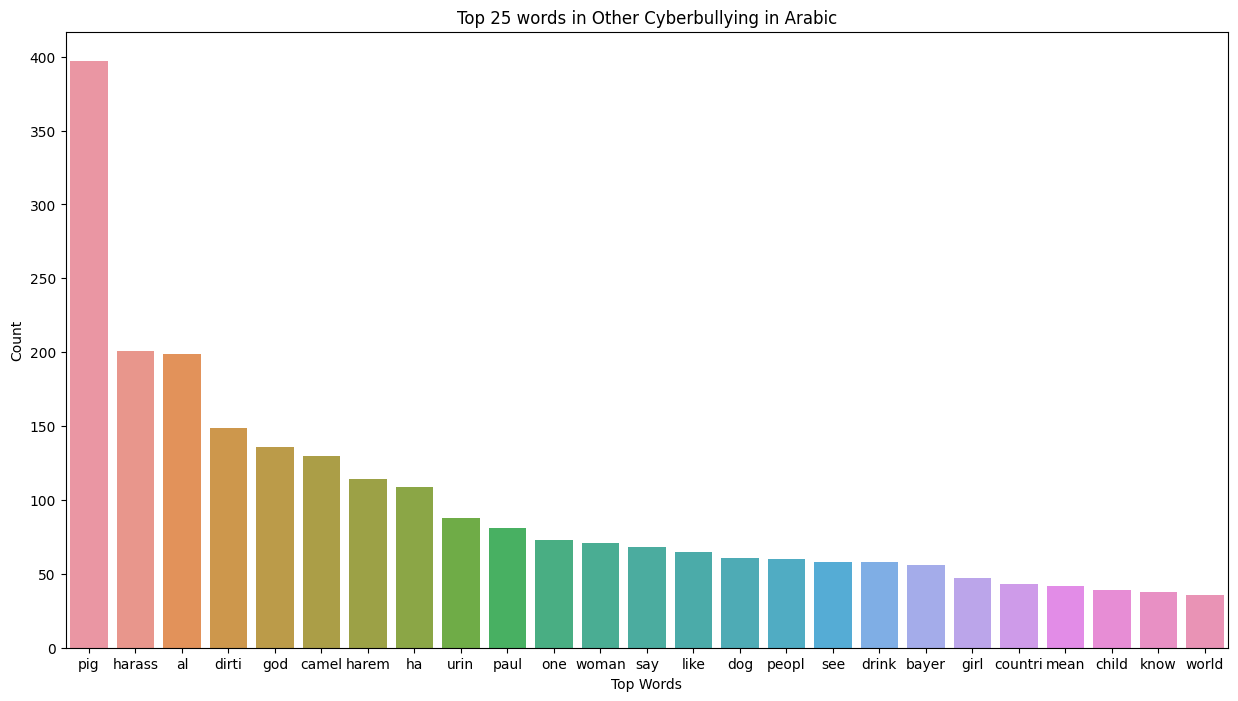

In [42]:
fig = plt.figure(figsize=(15,8))
sns.barplot(data=top25_other, y="Count", x="Top Words")
plt.title("Top 25 words in Other Cyberbullying in Arabic")

In [43]:
origin = Counter([item for sublist in origin_type['tweet_list'] for item in sublist])
top25_origin = pd.DataFrame(origin.most_common(25))
top25_origin.columns = ['Top Words','Count']
top25_origin.style.background_gradient(cmap='Greens')

,Top Words,Count
0,pig,252
1,camel,192
2,al,151
3,urin,105
4,paul,102
5,god,93
6,drink,91
7,ha,91
8,peopl,69
9,bayer,63


Text(0.5, 1.0, 'Top 25 words in Origin Cyberbullying in Arabic')

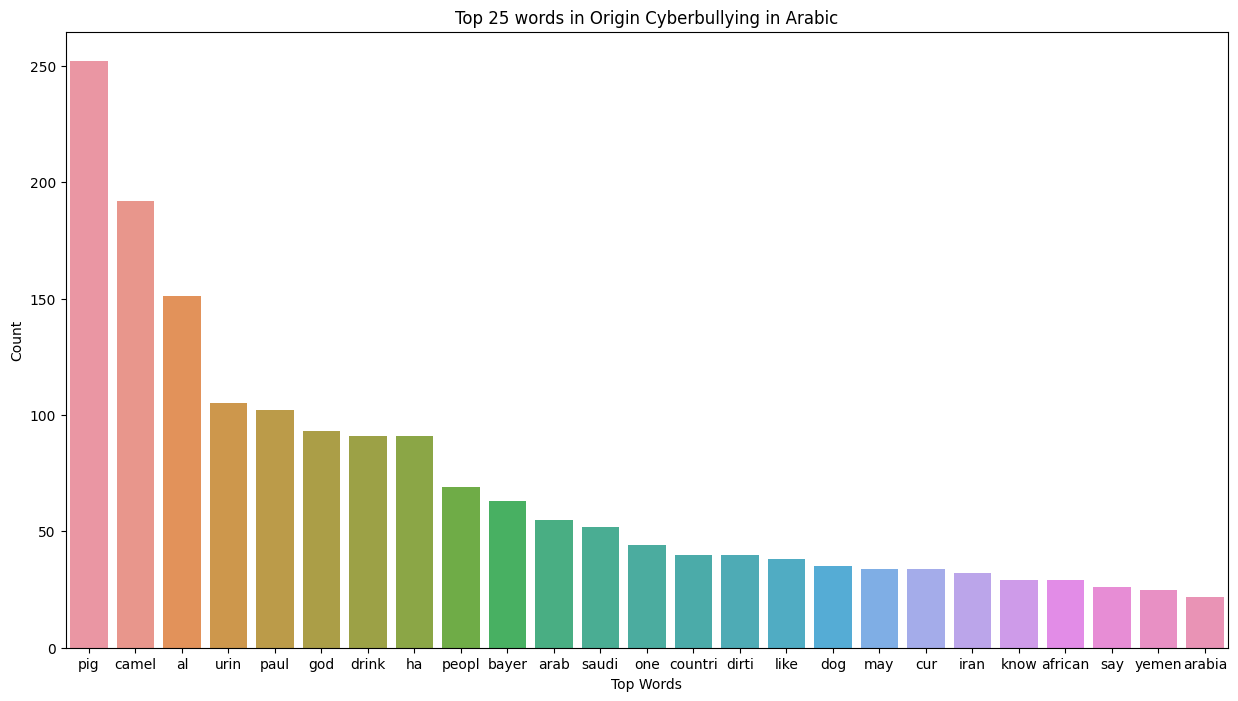

In [44]:
fig = plt.figure(figsize=(15,8))
sns.barplot(data=top25_origin, y="Count", x="Top Words")
plt.title("Top 25 words in Origin Cyberbullying in Arabic")

In [45]:
gender = Counter([item for sublist in gender_type['tweet_list'] for item in sublist])
top25_gender = pd.DataFrame(gender.most_common(25))
top25_gender.columns = ['Top Words','Count']
top25_gender.style.background_gradient(cmap='Greens')

,Top Words,Count
0,harass,187
1,harem,128
2,woman,50
3,girl,50
4,god,43
5,men,29
6,say,29
7,word,24
8,right,24
9,one,23


Text(0.5, 1.0, 'Top 25 words in Gender Cyberbullying in Arabic')

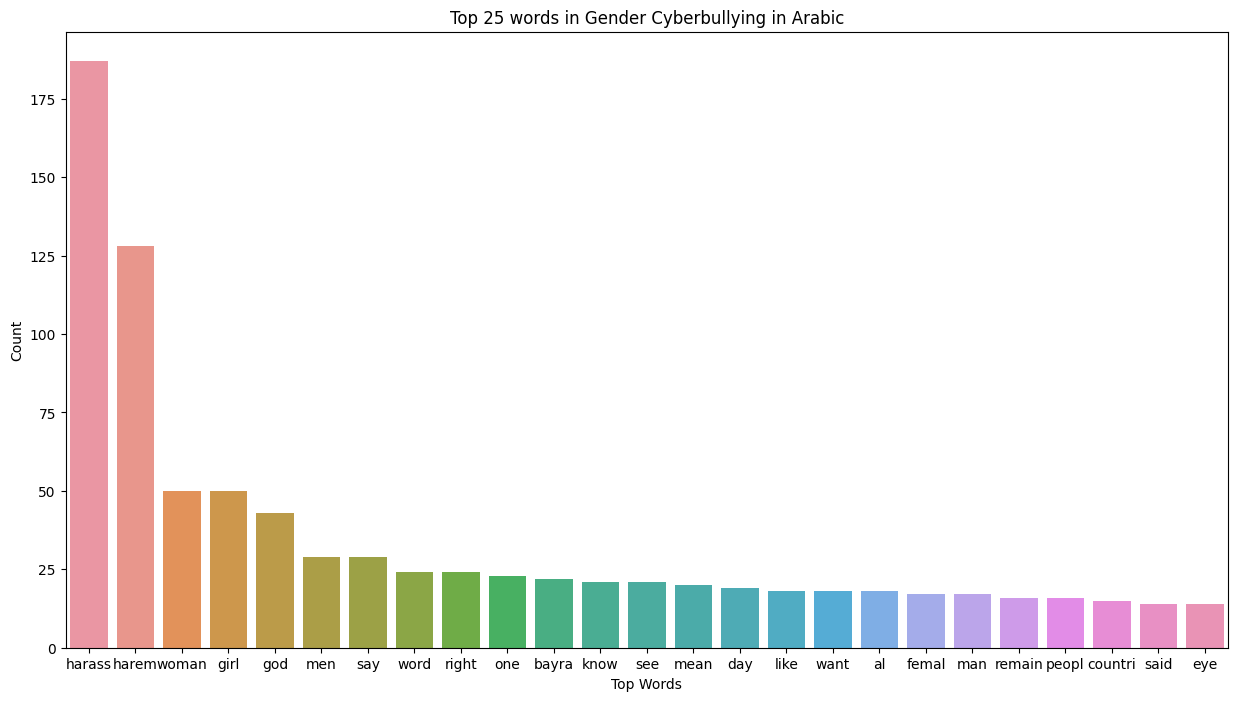

In [46]:
fig = plt.figure(figsize=(15,8))
sns.barplot(data=top25_gender, y="Count", x="Top Words")
plt.title("Top 25 words in Gender Cyberbullying in Arabic")

In [47]:
religion = Counter([item for sublist in religion_type['tweet_list'] for item in sublist])
top25_religion = pd.DataFrame(religion.most_common(25))
top25_religion.columns = ['Top Words','Count']
top25_religion.style.background_gradient(cmap='Greens')

,Top Words,Count
0,pig,51
1,god,28
2,muslim,24
3,shiit,20
4,al,18
5,hindu,17
6,urin,16
7,camel,15
8,religion,14
9,jew,11


Text(0.5, 1.0, 'Top 25 words in Religion Cyberbullying in Arabic')

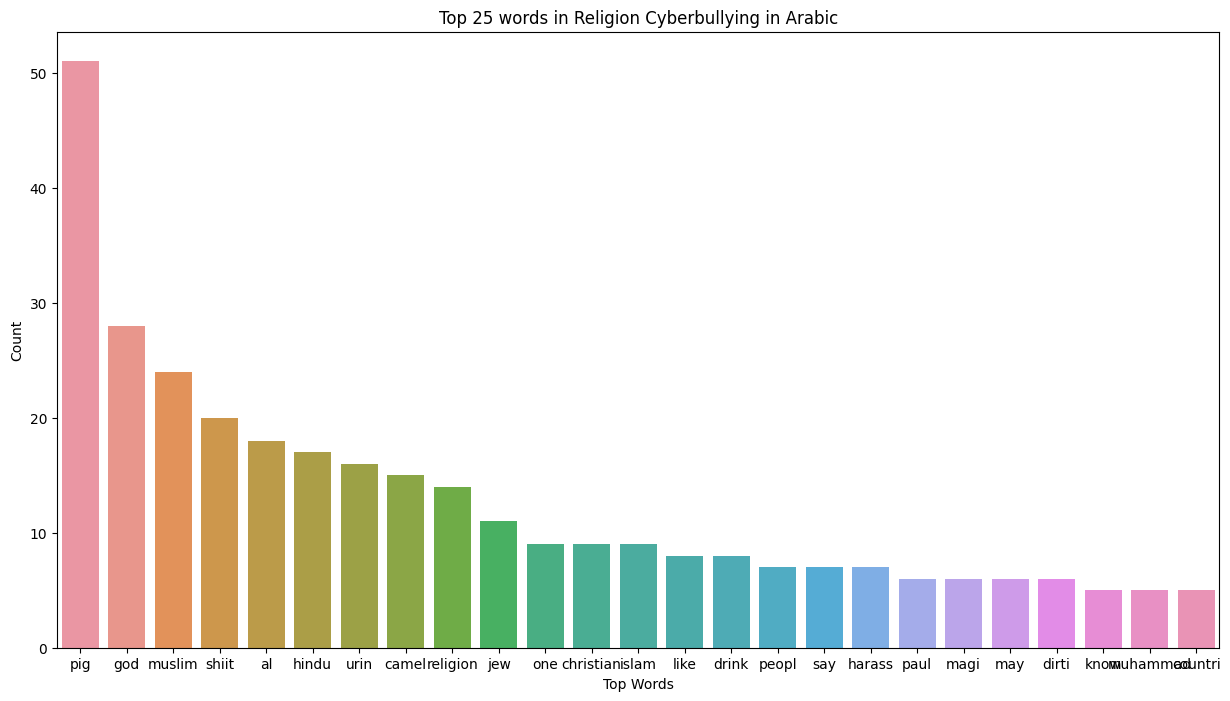

In [48]:
fig = plt.figure(figsize=(15,8))
sns.barplot(data=top25_religion, y="Count", x="Top Words")
plt.title("Top 25 words in Religion Cyberbullying in Arabic")

In [49]:
df.head()

,text,target,translated_text,target_encoded,cleaned_text,tweet_list,text_len
0,صلاة الفجر خير لك من ترديد بول البعير وسبي الن...,gender,Fajr prayer is better for you than repeating t...,2,fajr prayer better repeat urin camel captiv wo...,"[fajr, prayer, better, repeat, urin, camel, ca...",14
1,صراحة نفسي اشوف ولاد الوسخة اللي قالوا مدرب اج...,other,"Frankly, I see the children of the dirt who sa...",0,frankli see child dirt said foreign coach god ...,"[frankli, see, child, dirt, said, foreign, coa...",10
2,طيب! هي متبرجة وعبايتها ملونه وطالعة من بيتهم ...,other,good!She is a proliferation and her abaya is c...,0,goodsh prolifer abaya color bright home without,"[goodsh, prolifer, abaya, color, bright, home,...",7
3,@user @user انا اوافقك بخصوص السوريين و العراق...,origin,@user @user I agree with you about the Syrians...,1,agre syrian iraqi saudi need kuwait bedouin,"[agre, syrian, iraqi, saudi, need, kuwait, bed...",7
4,هذه السعودية التي شعبها شعب الخيم و بول البعير...,origin,"This Saudi Arabia, whose people are the people...",1,saudi arabia whose peopl peopl tent paul al ba...,"[saudi, arabia, whose, peopl, peopl, tent, pau...",11


In [50]:
# Modelling

In [51]:
# Splitting data into test and train

In [52]:
X,Y = df['cleaned_text'],df['target_encoded']

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, stratify = Y, random_state = 42)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(2505,) (2505,) (627,) (627,)


In [54]:
from imblearn.over_sampling import RandomOverSampler

from collections import Counter

In [55]:
Counter(y_train)

Counter({2: 418, 1: 645, 0: 1332, 3: 110})

In [56]:
tf_idf = TfidfVectorizer()
X_train_tf = tf_idf.fit_transform(X_train)
X_test_tf = tf_idf.transform(X_test)
print(X_train_tf.shape)
print(X_test_tf.shape)

(2505, 4018)
(627, 4018)


In [57]:
ROS = RandomOverSampler(random_state=777)

In [58]:
X_train_ros, y_train_ros = ROS.fit_resample(X_train_tf, y_train)

In [59]:
Counter(y_train_ros)

Counter({2: 1332, 1: 1332, 0: 1332, 3: 1332})

In [60]:
# trying differnt models

In [61]:
# @title XGBoost

In [62]:
%pip install xgboost

In [63]:
import xgboost as xgb

In [64]:
xg= xgb.XGBClassifier(n_estimators=100)

In [65]:
xg.fit(X_train_ros,y_train_ros)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [66]:
pred=xg.predict(X_test_tf)

In [67]:
accuracy = accuracy_score(y_test,pred)
print(accuracy)
print(classification_report(y_test,pred))

0.5518341307814992
              precision    recall  f1-score   support

           0       0.62      0.53      0.57       333
           1       0.54      0.56      0.55       162
           2       0.47      0.65      0.55       104
           3       0.35      0.39      0.37        28

    accuracy                           0.55       627
   macro avg       0.50      0.53      0.51       627
weighted avg       0.56      0.55      0.55       627



In [68]:
# @title Gradient Boost

In [69]:
from sklearn.ensemble import GradientBoostingClassifier
model=GradientBoostingClassifier(n_estimators= 50)

model.fit(X_train_ros,y_train_ros.values.ravel())

acc_score = model.score(X_test_tf, y_test)
print("model score: %.3f" % acc_score)

y_pred=model.predict(X_test_tf)
print(classification_report(y_test,y_pred))

model score: 0.545
              precision    recall  f1-score   support

           0       0.63      0.52      0.57       333
           1       0.52      0.52      0.52       162
           2       0.49      0.72      0.58       104
           3       0.29      0.36      0.32        28

    accuracy                           0.55       627
   macro avg       0.48      0.53      0.50       627
weighted avg       0.56      0.55      0.55       627



In [70]:
# @title Random Forest

In [71]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 100, criterion = 'entropy')
rf.fit(X_train_ros,y_train_ros)

RandomForestClassifier(criterion='entropy')

In [72]:
pred = rf.predict(X_test_tf)
accuracy=accuracy_score(y_test,pred)
print(accuracy)
print(classification_report(y_test,pred))

0.5614035087719298
              precision    recall  f1-score   support

           0       0.60      0.64      0.62       333
           1       0.52      0.49      0.50       162
           2       0.50      0.53      0.51       104
           3       0.56      0.18      0.27        28

    accuracy                           0.56       627
   macro avg       0.54      0.46      0.48       627
weighted avg       0.56      0.56      0.56       627



In [73]:
# @title Logistic Regression

In [74]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train_ros,y_train_ros)

LogisticRegression()

In [75]:
pred = lr.predict(X_test_tf)
accuracy = accuracy_score(y_test,pred)
print(accuracy)
print(classification_report(y_test,pred))

0.5311004784688995
              precision    recall  f1-score   support

           0       0.61      0.52      0.56       333
           1       0.48      0.52      0.50       162
           2       0.48      0.62      0.54       104
           3       0.32      0.32      0.32        28

    accuracy                           0.53       627
   macro avg       0.47      0.50      0.48       627
weighted avg       0.54      0.53      0.53       627



In [76]:
# @title Decision Tree

In [77]:
from sklearn.tree import DecisionTreeClassifier
df = DecisionTreeClassifier(criterion='entropy',random_state=42)
df.fit(X_train_ros,y_train_ros)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [78]:
pred = df.predict(X_test_tf)
accuracy = accuracy_score(y_test,pred)
print(accuracy)
print(classification_report(y_test,pred))

0.532695374800638
              precision    recall  f1-score   support

           0       0.59      0.60      0.60       333
           1       0.51      0.44      0.48       162
           2       0.45      0.50      0.47       104
           3       0.27      0.32      0.30        28

    accuracy                           0.53       627
   macro avg       0.46      0.47      0.46       627
weighted avg       0.53      0.53      0.53       627



In [79]:
# @title Hybrid Approach(Random Forest,LR,XG Boost)

In [80]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression

rf_model = RandomForestClassifier(n_estimators = 50, random_state = 42)
xgb_model = XGBClassifier(n_estimators = 50, random_state = 42)
lr_model = LogisticRegression()

rf_model.fit(X_train_ros, y_train_ros)
xgb_model.fit(X_train_ros, y_train_ros)
lr_model.fit(X_train_ros, y_train_ros)

LogisticRegression()

In [81]:
rf_preds = rf_model.predict(X_test_tf)
xgb_preds = xgb_model.predict(X_test_tf)
lr_preds = lr_model.predict(X_test_tf)

voting_clf = VotingClassifier(estimators=[
      ('random_forest', rf_model),
      ('xgboost', xgb_model),
      ('lr', lr_model)
  ], voting='hard')

voting_clf.fit(X_train_ros, y_train_ros)

VotingClassifier(estimators=[('random_forest',
                              RandomForestClassifier(n_estimators=50,
                                                     random_state=42)),
                             ('xgboost',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamma=None,...
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=50, n_jobs=None,
                                            num_parallel_tree=None,
                                            objective='multi:softprob', ...)),
                             ('lr', LogisticRegression())])

In [82]:
ensemble_preds = voting_clf.predict(X_test_tf)

In [83]:
print("Random Forest Accuracy:", accuracy_score(y_test, rf_preds))
print("XGBoost Accuracy:", accuracy_score(y_test, xgb_preds))
print("KNN Accuracy:", accuracy_score(y_test, lr_preds))
print("Ensemble Accuracy:", accuracy_score(y_test, ensemble_preds))
print(classification_report(y_test,ensemble_preds))

Random Forest Accuracy: 0.5709728867623605
XGBoost Accuracy: 0.5502392344497608
KNN Accuracy: 0.5311004784688995
Ensemble Accuracy: 0.5518341307814992
              precision    recall  f1-score   support

           0       0.61      0.56      0.58       333
           1       0.53      0.54      0.53       162
           2       0.47      0.62      0.53       104
           3       0.41      0.32      0.36        28

    accuracy                           0.55       627
   macro avg       0.50      0.51      0.50       627
weighted avg       0.56      0.55      0.55       627



In [84]:
# @title BERT MOdel

In [85]:
%pip install tensorflow
%pip install tensorflow-text

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 17.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 41.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.0/442.0 kB 35.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 54.0 MB/s eta 0:00:00
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.14.0
    Uninstalling tensorflow-estimator-2.14.0:
      Successfully uninstalled tensorflow-estimator-2.14.0
  Attempting uninstall: keras
    Found existing installation: keras 2.14.0
    Uninstalling keras-2.14.0:
      Successfully uninstalled keras-2.14.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.14.1
    Uninstalling tensorboard-2.14.1:
      Successfully uninstalled tensorboard-2.14.1
  Attempting uninstall: tensorflow
    Found existing install

In [86]:
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text

In [87]:
bert_preprocess = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3")
bert_encoder = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4")

In [88]:
# Bert layers
text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
preprocessed_text = bert_preprocess(text_input)
outputs = bert_encoder(preprocessed_text)

# Neural network layers
l = tf.keras.layers.Dropout(0.1, name="dropout")(outputs['pooled_output'])
l = tf.keras.layers.Dense(1, activation='sigmoid', name="output")(l)

 #Use inputs and outputs to construct a final model
model = tf.keras.Model(inputs=[text_input], outputs = [l])

In [89]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 text (InputLayer)           [(None,)]                    0         []                            
                                                                                                  
 keras_layer (KerasLayer)    {'input_type_ids': (None,    0         ['text[0][0]']                
                             128),                                                                
                              'input_word_ids': (None,                                            
                             128),                                                                
                              'input_mask': (None, 128)                                           
                             }                                                                

In [90]:
model.compile(optimizer='adam',
              loss='CategoricalCrossentropy',
              metrics=['accuracy'])

In [93]:
model.fit(X_train_ros, y_train_ros, epochs=1)

ValueError: ignored